In [ ]:
from PyLyrics import *
wknd = 'The_Weeknd'
starboy = ["Starboy","Party Monster","False Alarm","Reminder","Rockin'","Secrets","True Colors","Stargirl Interlude","Sidewalks","Six Feet Under","Love to Lay","A Lonely Night","Attention","Ordinary Life","Nothing Without You","All I Know","Die For You","I Feel It Coming"]
trilogy =['High For This','What You Need',"House of Balloons / Glass Table Girls",'The Morning','Wicked Games','The Party & The After Party','Coming Down','Loft Music','The Knowing','Twenty Eight','Lonely Star','Life of the Party','Thursday','The Zone','The Birds Part One','The Birds Part Two','Gone','Rolling Stone','Heaven or Las Vegas','Valerie','D.D.','Montreal','Outside','XO / The Host','Initiation','Same Old Song','The Fall','Next','Echoes of Silence','Till Dawn (Here Comes The Sun)']
kissland = ['Professional','The Town',"Adaptation",'Love In The Sky','Belong To The World','Live For','Wanderlust','Kiss Land','Pretty','Tears In The Rain']
bbtm = ["Real Life","Losers","Tell Your Friends","Often","The Hills","Acquainted","Can't Feel My Face","Shameless","Earned It","In The Night","As You Are","Dark Times","Prisoner","Angel"]

In [ ]:
import pandas as pd
df = pd.DataFrame()
lyr = []
alb = []
for song in starboy:
    lyr.append(PyLyrics.getLyrics(wknd,song))
    alb.append('Starboy')
for song in bbtm:
    lyr.append(PyLyrics.getLyrics(wknd,song))
    alb.append('Beauty Behind The Madness')
for song in kissland:
    lyr.append(PyLyrics.getLyrics(wknd,song))
    alb.append('Kiss Land')
for song in trilogy:
    lyr.append(PyLyrics.getLyrics(wknd,song))
    alb.append('Trilogy')

In [ ]:
songs = starboy + bbtm + kissland + trilogy 
df['Album'] = alb
df['Song'] = songs
df['Lyrics'] = lyr

In [ ]:
songs1 = df['Lyrics']

In [172]:
count = {}
for w in songs1:
    w = w.replace(',','')
    w = w.replace('(','')
    w = w.replace(')','')
    w = w.replace('-',' ')
    w = w.replace('?','')
    w = w.split()
    w = [x.lower() for x in w]

    for wo in w:
        if wo in count:
            count[wo] += 1
        else:
            count[wo] = 1

In [174]:
count['love']

250

In [241]:
import wordcloud
import sklearn
import re
import string
import nltk

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

In [181]:
df

,Album,Song,Lyrics
0,Starboy,Starboy,"I'm tryna put you in the worst mood, ah\nP1 cl..."
1,Starboy,Party Monster,"I'm good, I'm good, I'm great\nKnow it's been ..."
2,Starboy,False Alarm,Bathroom stalls for the powder nose (she loves...
3,Starboy,Reminder,Recommend play my song on the radio\nYou too b...
4,Starboy,Rockin',People always talk about the ones that got awa...
5,Starboy,Secrets,"Everybody here wants you\nMy love, my love\nAn..."
6,Starboy,True Colors,"Tell me the truth\nBaby girl, who else been wi..."
7,Starboy,Stargirl Interlude,I had a vision\nA vision of my nails in the ki...
8,Starboy,Sidewalks,I ran out of tears when I was 18\nSo nobody ma...
9,Starboy,Six Feet Under,Ask around about her\nShe don't get emotional\...


In [196]:
df2 = pd.DataFrame()
df2['Album'] = df['Album']
df2['Lyrics'] = df['Lyrics']

In [200]:
df2 = df2.groupby('Album')['Lyrics'].apply(lambda x: '%s' % " ".join(x)).reset_index()

## 

In [ ]:
for c in string.punctuation:
    print (c)

In [231]:
def clean_data(str1):
    str1 = str1.lower()
    for punc in string.punctuation:
        str1 = str1.replace(punc,'')
    str1 = re.sub("\s\s", " ",str1)
    str1 = re.sub('\n',' ',str1)
    return (str1)
    
    
    
    

In [232]:
for n in df2['Lyrics']:
    clean_data(n)

In [237]:
for n in df2.index:
    df2.loc[n,"Lyrics"] = clean_data(df2.loc[n,"Lyrics"])

In [238]:
df2

,Album,Lyrics
0,Beauty Behind The Madness,tell em this boy wasnt made for lovin tell em ...
1,Kiss Land,its ideal you need someone to tell you how to ...
2,Starboy,im tryna put you in the worst mood ah p1 clean...
3,Trilogy,you dont know whats in store but you know what...


In [240]:
clean_df = df2

In [263]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = list(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/veeralshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [276]:
stopWords = list(stopwords.words('english'))
sw = []
for s in stopWords:
    s1 = s.replace("'","")
    sw.append(s1)

In [278]:
cv = CountVectorizer(stop_words = 'english')

In [282]:
data_cv = cv.fit_transform(clean_df.Lyrics)

In [291]:
data_dtm = pd.DataFrame(data_cv.toarray(),columns = cv.get_feature_names())
data_dtm.index = clean_data.Album

In [293]:
data_dtm = data_dtm.transpose()

In [ ]:
data_dtm

In [307]:
top30 = {}
dftest = data_dtm.sort_values(by = "Beauty Behind The Madness",ascending = "False")

In [ ]:
dftest

In [ ]:
df

In [311]:
df2

,Album,Lyrics
0,Beauty Behind The Madness,tell em this boy wasnt made for lovin tell em ...
1,Kiss Land,its ideal you need someone to tell you how to ...
2,Starboy,im tryna put you in the worst mood ah p1 clean...
3,Trilogy,you dont know whats in store but you know what...


In [319]:
?wordcloud.WordCloud

In [386]:
top_dict = {}
for n in data_dtm:
    top30 = data_dtm[n].sort_values(ascending = False).head(30)
    top_dict[n] = list(zip(top30.index, top30.values))
    #top_dict[n] = data_
print (top_dict.values())

dict_values([[('im', 82), ('love', 81), ('know', 66), ('yeah', 53), ('life', 50), ('ill', 48), ('real', 43), ('dont', 39), ('somebody', 38), ('girl', 35), ('cause', 30), ('baby', 28), ('thats', 27), ('youre', 27), ('oh', 26), ('time', 24), ('hope', 23), ('feel', 22), ('got', 22), ('tell', 20), ('times', 20), ('make', 18), ('heart', 18), ('like', 17), ('dark', 16), ('want', 16), ('said', 15), ('say', 15), ('friends', 15), ('just', 15)], [('love', 58), ('girl', 38), ('shit', 33), ('im', 30), ('make', 29), ('little', 29), ('feel', 28), ('live', 28), ('diamond', 27), ('youre', 26), ('precious', 25), ('just', 24), ('away', 24), ('let', 24), ('dont', 24), ('like', 23), ('world', 22), ('know', 22), ('cause', 20), ('leave', 18), ('come', 17), ('oh', 16), ('thang', 16), ('youve', 16), ('die', 15), ('got', 15), ('ive', 14), ('belong', 12), ('tried', 12), ('id', 11)], [('know', 155), ('hey', 84), ('im', 83), ('feel', 73), ('just', 72), ('yeah', 67), ('dont', 67), ('coming', 61), ('nothin', 58), (

In [400]:
wc = wordcloud.WordCloud(background_color = "white",colormap = "Dark2",max_font_size= 150,random_state=42)

In [355]:
clean_data = clean_data.set_index('Album')
    

Beauty Behind The Madness
Kiss Land
Starboy
Trilogy


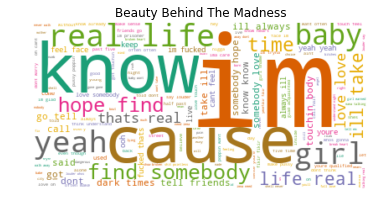

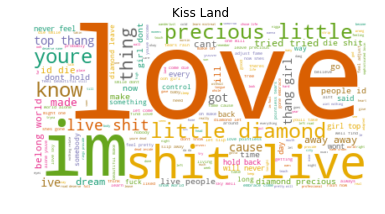

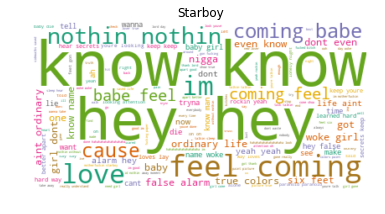

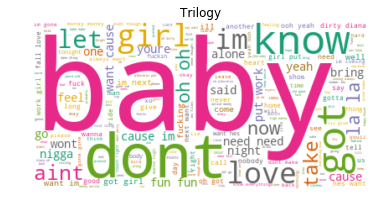

In [376]:
import matplotlib.pyplot as plt
for n in clean_data.index:
    print (n)
    wc.generate(clean_data.loc[n,'Lyrics'])
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(n)


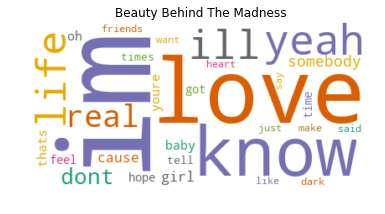

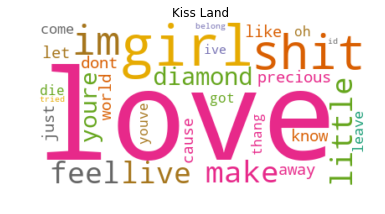

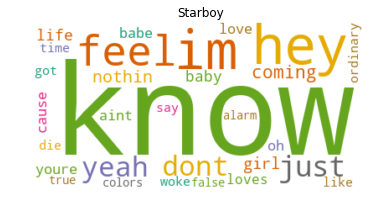

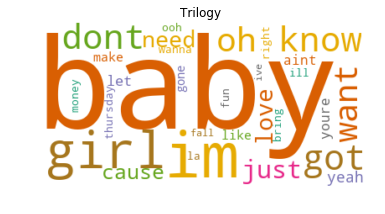

In [406]:
for n in top_dict:
    wc.generate_from_frequencies(dict(top_dict[n]))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(n)


In [407]:
clean_data

,Lyrics
Album,
Beauty Behind The Madness,tell em this boy wasnt made for lovin tell em ...
Kiss Land,its ideal you need someone to tell you how to ...
Starboy,im tryna put you in the worst mood ah p1 clean...
Trilogy,you dont know whats in store but you know what...


In [421]:
from textblob import TextBlob
df.tail()

,Album,Song,Lyrics
67,Trilogy,Same Old Song,"Where were you when I needed you, eight months..."
68,Trilogy,The Fall,You can pick my voice to dance to\nYou say my ...
69,Trilogy,Next,"She pop that pussy on a Monday, she never fall..."
70,Trilogy,Echoes of Silence,"Talk to me baby, tell me what you're feeling\n..."
71,Trilogy,Till Dawn (Here Comes The Sun),I tell myself that I'll take you for the last ...


In [437]:
pol = []
sub = []
for n in range(0,len(df.index)):
    pol.append(TextBlob(df.loc[n,"Lyrics"]).sentiment.polarity)
    sub.append(TextBlob(df.loc[n,"Lyrics"]).sentiment.subjectivity)
df['Polarity'] = pol
df['Subjectivity'] = sub   

In [438]:
df.head()

,Album,Song,Lyrics,Polarity,Subjectivity
0,Starboy,Starboy,"I'm tryna put you in the worst mood, ah\nP1 cl...",0.131546,0.505317
1,Starboy,Party Monster,"I'm good, I'm good, I'm great\nKnow it's been ...",0.372623,0.435371
2,Starboy,False Alarm,Bathroom stalls for the powder nose (she loves...,-0.176667,0.565983
3,Starboy,Reminder,Recommend play my song on the radio\nYou too b...,0.062789,0.419544
4,Starboy,Rockin',People always talk about the ones that got awa...,0.137500,0.328125


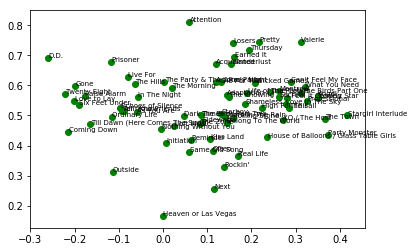

In [443]:
for n in df.index:
    pol1 = df.loc[n,'Polarity']
    sub1 = df.loc[n,'Subjectivity']
    plt.scatter(pol1,sub1, color = "Green")
    plt.text(pol1+.001,sub1+.001,df.loc[n,'Song'], fontsize = 7)
    

/Users/veeralshah/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/veeralshah/anaconda3/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Sentiment(polarity=0.12499999999999997, subjectivity=0.6138888888888889)